In [1]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns



In [2]:
airline = pd.read_excel(r"C:\Users\sdkag\OneDrive\Documents\Research Project Dataset(AutoRecovered).xlsx",sheet_name='Sheet1',index_col ='month', parse_dates = True) 
airline 

,Arrival(in ton)
month,
2010-01-01,18.108688
2010-02-01,19.938417
2010-03-01,24.788689
2010-04-01,24.663240
2010-05-01,14.229670
...,...
2024-05-01,21.294051
2024-06-01,16.947092
2024-07-01,13.303412


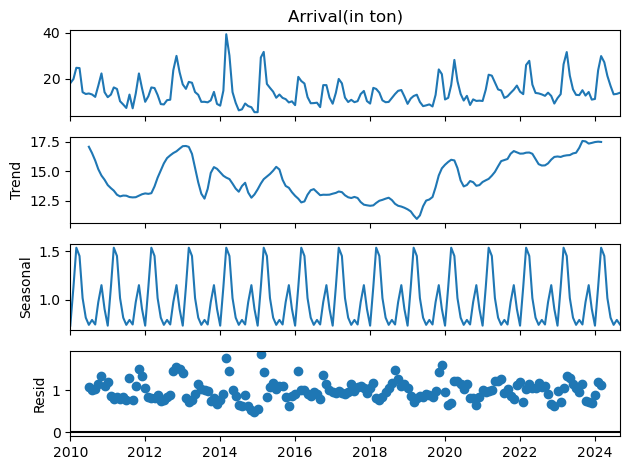

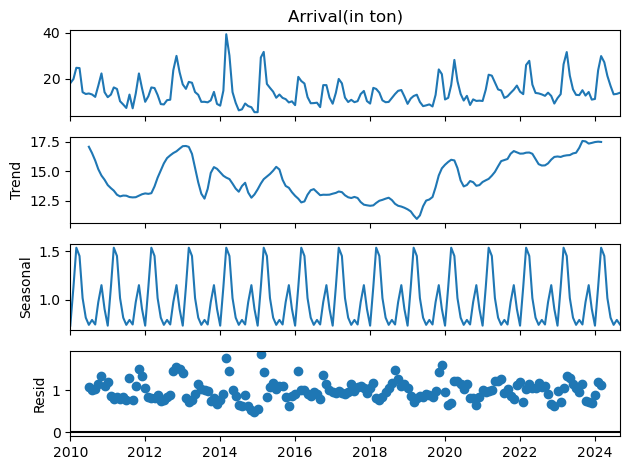

In [3]:
airline = pd.read_excel(r"C:\Users\sdkag\OneDrive\Documents\Research Project Dataset(AutoRecovered).xlsx",sheet_name='Sheet1',index_col ='month', parse_dates = True) 
airline  
# Print the first five rows of the dataset 
airline.head() 
  
# ETS Decomposition 
result = seasonal_decompose(airline['Arrival(in ton)'],  
                            model ='multiplicative') 
  
# ETS plot  
result.plot() 

In [4]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(airline['Arrival(in ton)'])
#HYPOTHESIS TEST:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    
    result=adfuller(sales)
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [5]:
adfuller_test(airline['Arrival(in ton)'])

ADF Test Statistic : -2.941361570998244
p-value : 0.040745306398543825
#Lags Used : 10
Number of Observations Used : 166
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [6]:
!pip install pmdarima 
  
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(airline['Arrival(in ton)'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 0, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=997.240, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1127.558, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1003.306, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1002.201, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1478.939, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1025.809, Time=0.20 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=985.495, Time=1.18 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=988.888, Time=0.46 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=983.993, Time=2.40 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=989.379, Time=1.57 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.82 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=981.180, Time=2.51 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=995.696, Time=0.83 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=987.034, Time=2.13 sec
 ARIMA(1,0,0)(1,0,2)[12] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  177
Model:             SARIMAX(0, 0, 2)x(1, 0, 2, 12)   Log Likelihood                -483.274
Date:                            Fri, 17 Jan 2025   AIC                            980.547
Time:                                    13:03:30   BIC                           1002.780
Sample:                                01-01-2010   HQIC                           989.564
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6503      1.085      0.600      0.549      -1.476       2.776
ma.L1          0.7425      0.077      9.649      0.000       0.592       0.893
ma.L2          0.1886      0.082      2.294      0.022       0.027       0.350
ar.S.L12       0.9562      0.072     13.232      0.000       0.815       1.098
ma.S.L12      -0.5977      0.141     -4.233      0.000      -0.874      -0.321
ma.S.L24      -0.2114      0.098     -2.161      0.031      -0.403      -0.020
sigma2        13.1399      1.010     13.016      0.000      11.161      15.119
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               504.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             1.89
Prob(H) (two-sided):                  0.18   Kurtosis:                        10.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(airline['Arrival(in ton)'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 0, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=997.240, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1127.558, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1003.306, Time=0.37 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1002.201, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1478.939, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1025.809, Time=0.20 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=985.495, Time=1.20 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=988.888, Time=0.46 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=983.993, Time=2.34 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=989.379, Time=1.59 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.79 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=981.180, Time=2.51 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=995.696, Time=0.80 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=987.034, Time=2.09 sec
 ARIMA(1,0,0)(1,0,2)[12] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  177
Model:             SARIMAX(0, 0, 2)x(1, 0, 2, 12)   Log Likelihood                -483.274
Date:                            Fri, 17 Jan 2025   AIC                            980.547
Time:                                    13:04:12   BIC                           1002.780
Sample:                                01-01-2010   HQIC                           989.564
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6503      1.085      0.600      0.549      -1.476       2.776
ma.L1          0.7425      0.077      9.649      0.000       0.592       0.893
ma.L2          0.1886      0.082      2.294      0.022       0.027       0.350
ar.S.L12       0.9562      0.072     13.232      0.000       0.815       1.098
ma.S.L12      -0.5977      0.141     -4.233      0.000      -0.874      -0.321
ma.S.L24      -0.2114      0.098     -2.161      0.031      -0.403      -0.020
sigma2        13.1399      1.010     13.016      0.000      11.161      15.119
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               504.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             1.89
Prob(H) (two-sided):                  0.18   Kurtosis:                        10.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# Split data into train / test sets 
train = airline.iloc[:len(airline)-12] 
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['Arrival(in ton)'],  
                order = (1, 0, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Arrival(in ton)   No. Observations:                  165
Model:             SARIMAX(1, 0, 1)x(2, 1, 1, 12)   Log Likelihood                -423.090
Date:                            Fri, 17 Jan 2025   AIC                            858.180
Time:                                    13:04:15   BIC                            876.363
Sample:                                01-01-2010   HQIC                           865.566
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2948      0.163      1.812      0.070      -0.024       0.614
ma.L1          0.4077      0.147      2.779      0.005       0.120       0.695
ar.S.L12       0.2648      0.099      2.676      0.007       0.071       0.459
ar.S.L24      -0.0522      0.090     -0.580      0.562      -0.228       0.124
ma.S.L12      -0.9995     34.049     -0.029      0.977     -67.735      65.736
sigma2        12.3557    419.918      0.029      0.977    -810.668     835.379
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               279.77
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             1.48
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

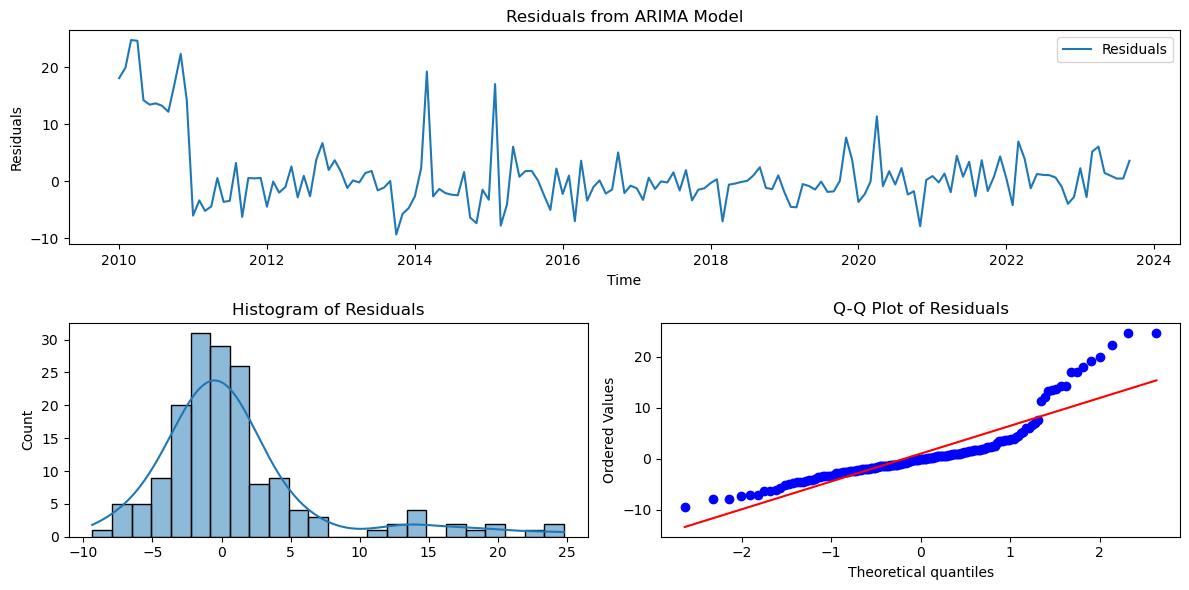

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
    #Get residuals
residuals = result.resid

# Residual plot
plt.figure(figsize=(12, 6))

# Residual time series plot
plt.subplot(2, 1, 1)
plt.plot(residuals, label='Residuals')
plt.title('Residuals from ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()

# Histogram of residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

# Q-Q plot
plt.subplot(2, 2, 4)
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

<Axes: xlabel='month'>

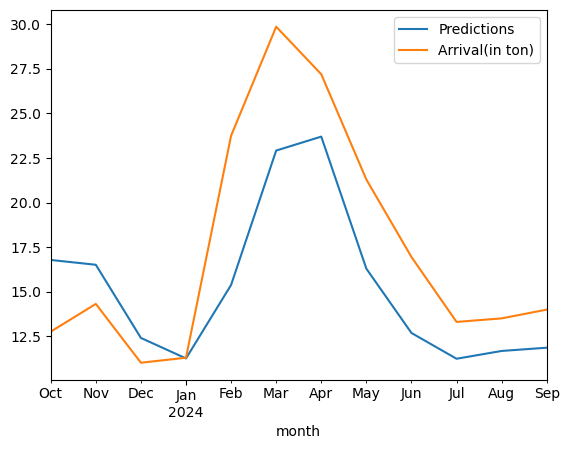

In [10]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Arrival(in ton)'].plot(legend = True) 

In [11]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["Arrival(in ton)"], predictions) 
  
# Calculate mean squared error 
mse=mean_squared_error(test["Arrival(in ton)"], predictions) 
print("mean_squared_error:",mse)
mape=mean_absolute_percentage_error(test["Arrival(in ton)"], predictions)
print("mean_absolute_percentage_error:",mape)

mean_squared_error: 17.414853339713396
mean_absolute_percentage_error: 0.18686332874586106


<Axes: xlabel='month'>

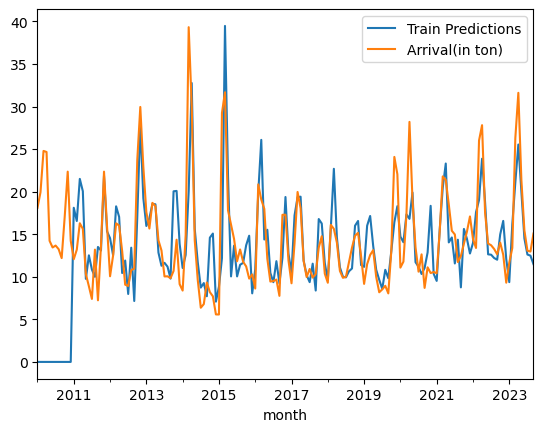

In [12]:
# Set start and end for training data
start_train = 0
end_train = len(train) - 1

# Generate predictions on the training data
train_predictions = result.predict(start=start_train, end=end_train, typ='levels').rename("Train Predictions")

# Plot the predictions against actual values for training data
train_predictions.plot(legend=True)
train['Arrival(in ton)'].plot(legend=True)


In [13]:
# Calculate mean squared error 
mse=mean_squared_error(train["Arrival(in ton)"], train_predictions ) 
print("mean_squared_error:",mse)
mape=mean_absolute_percentage_error(train["Arrival(in ton)"], train_predictions )
print("mean_absolute_percentage_error:",mape)

mean_squared_error: 37.06364659461707
mean_absolute_percentage_error: 0.2559708308752801


<Axes: xlabel='month'>

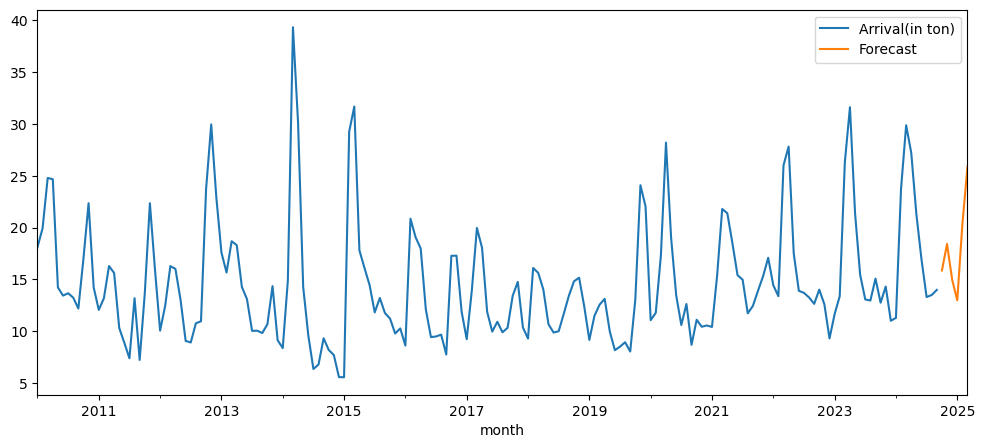

In [14]:
model = model = SARIMAX(airline['Arrival(in ton)'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(airline),  
                          end = len(airline) + 6 - 1,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
airline['Arrival(in ton)'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [16]:
print(forecast)

2024-10-01    15.866170
2024-11-01    18.418954
2024-12-01    14.982919
2025-01-01    12.995896
2025-02-01    20.300576
2025-03-01    25.884237
Freq: MS, Name: Forecast, dtype: float64


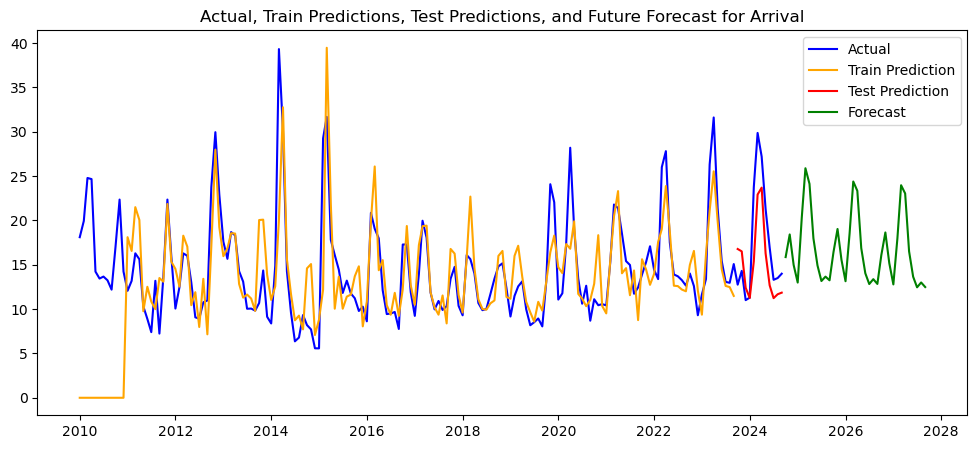

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(airline['Arrival(in ton)'], label='Actual', color='blue')  # Actual data
plt.plot(train_predictions, label='Train Prediction', color='orange')  # Predictions on training data
plt.plot(predictions, label='Test Prediction', color='red')       # Predictions on test data
plt.plot(forecast, label='Forecast', color='green')             # Future forecast

plt.legend()
plt.title('Actual, Train Predictions, Test Predictions, and Future Forecast for Arrival')
plt.show()

In [29]:
print(forecast)

2024-10-01    15.866170
2024-11-01    18.418954
2024-12-01    14.982919
2025-01-01    12.995896
2025-02-01    20.300576
2025-03-01    25.884237
2025-04-01    24.124285
2025-05-01    17.979794
2025-06-01    14.925389
2025-07-01    13.167072
2025-08-01    13.663482
2025-09-01    13.248073
2025-10-01    16.417215
2025-11-01    19.034523
2025-12-01    15.565841
2026-01-01    13.145098
2026-02-01    18.524277
2026-03-01    24.390574
2026-04-01    23.340884
2026-05-01    16.874894
2026-06-01    14.041524
2026-07-01    12.826262
2026-08-01    13.377800
2026-09-01    12.837556
2026-10-01    16.070810
2026-11-01    18.643363
2026-12-01    15.174899
2027-01-01    12.785164
2027-02-01    18.003012
2027-03-01    23.971479
2027-04-01    23.041813
2027-05-01    16.511003
2027-06-01    13.653462
2027-07-01    12.457402
2027-08-01    13.004368
2027-09-01    12.488546
Freq: MS, Name: Forecast, dtype: float64


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np

# Step 1: Fit your ARIMA model
# Assuming `model_fit` is your fitted ARIMA model
# Assuming `df['modal price']` is your actual values column

# Step 2: Generate forecast
forecast = result.predict(start=1, end=len(airline))  # Adjust start and end as per your use case

# Step 3: Calculate MSE
actual = airline['Arrival(in ton)']
mse = mean_squared_error(actual, forecast)
mape=mean_absolute_percentage_error(actual, forecast)

# Step 4: Print MSE
print(f'Mean Squared Error: {mse}')
print(f'Mean absolute percentage Error: {mape}')

Mean Squared Error: 16.08129815501132
Mean absolute percentage Error: 0.23751735395089796


In [31]:
np.sqrt(mse)

4.010149393103868

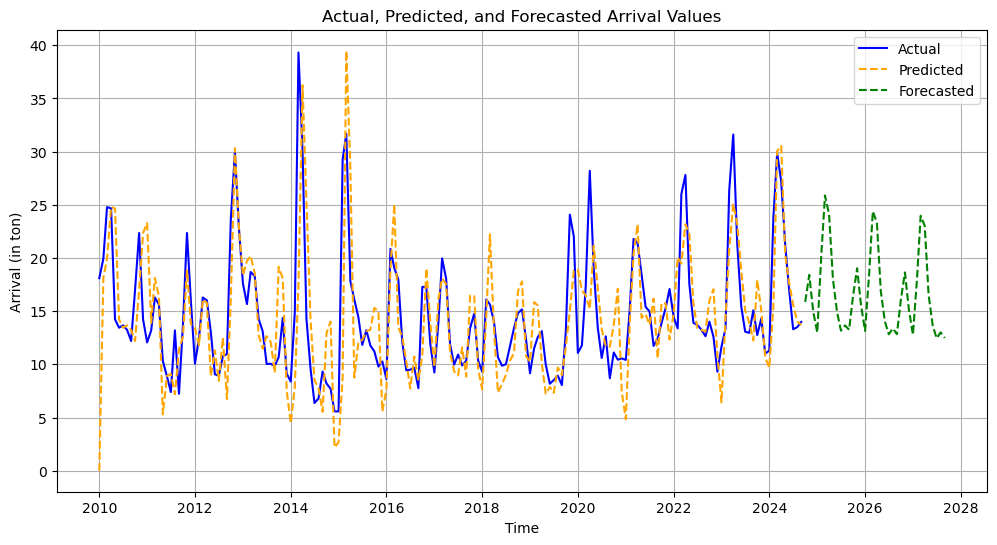

In [32]:
predicted_values = result.predict(start=0, end=len(airline)-1, typ='levels').rename('Predicted')

# Forecast for the next 3 years (36 months for monthly data)
forecast = result.predict(start=len(airline), 
                          end=(len(airline)-1) + 3 * 12, 
                          typ='levels').rename('Forecast')

# Create a combined DataFrame with actual, predicted, and forecasted values
combined = pd.DataFrame({
    'Actual': airline['Arrival(in ton)'],
    'Predicted': predicted_values,
    'Forecast': pd.concat([pd.Series([None] * len(airline), index=airline.index), forecast])  # None for forecasted values in historical period
})

# Plot the actual, predicted, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['Actual'], label='Actual', color='blue')
plt.plot(combined.index, combined['Predicted'], label='Predicted', color='orange', linestyle='--')
plt.plot(forecast.index, forecast, label='Forecasted', color='green', linestyle='--')

# Customize plot
plt.xlabel('Time')
plt.ylabel('Arrival (in ton)')
plt.title('Actual, Predicted, and Forecasted Arrival Values')
plt.legend()
plt.grid(True)
plt.show()